<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 0 - Introducción a Redes Neuronales </H3>
<hr style="height:2px;border:none"/>
<H3 align='center'>Fernanda Weiss 201373536-3 </H3>

<H3 align='center'> Ignacio Espinoza 201073527-3 </H3>
<hr style="height:2px;border:none"/>

## 1. Back-propagation (BP) from *Scratch*


BP (Back-propagation) es sin duda el paradigma dominante para entrenar redes neuronales *feed-forward*. En
redes grandes, diseñadas para problemas reales, implementar BP eficientemente puede ser una tarea delicada
que puede ser razonable delegar a una librerı́a especializada. Sin embargo, construir BP *from scratch* es muy
útil con fines pedagógicos.

$$ w^{(t+1)} \leftarrow w^{(t)} - \eta \nabla_{w^{(t)}} Loss $$
 
> a) Escriba un programa que permita entrenar una red FF con una arquitectura fija de 2 capa ocultas (con 32 neuronas en la primera capa y 16 en la segunda) y $K$ neuronas de salida, sin usar librerı́as, excepto eventualmente *numpy* para implementar operaciones básicas de algebra lineal. Por simplicidad, asuma funciones de activacion y error (*loss function*) diferenciables o subdiferenciables, además de tener la misma función de activación para las 2 capas ocultas. Adapte la arquitectura para un problema de clasificación de 3 clases, es decir la función de activación para la capa de salida debe ser **softmax** con número de neuronas $K$=3. Escriba funciones para:  
* (i)  implementar el *forward pass*  
* (ii) implementar el *backward pass*  
* (iii) implementar la rutina principal de entrenamiento, adoptando, por simplicidad, la variante cíclica aleatorizada de SGD (un ejemplo a la vez, pero iterando cíclicamente sobre una configuración aleatoria del conjunto de entrenamiento) con una tasa de aprendizaje fija de 0.1 y número de ciclos fijos (*epochs*).

<a id="1-b"></a>
> b) Escriba una función que permita hacer predicciones mediante la red FF definida anteriormente, sin usar librerı́as, excepto eventualmente *numpy*. Escriba una función vectorizada que implemente el forward pass sobre un conjunto de $n_{t}$ ejemplos, además de implementar la función de decisión, que a través de la salida de la red prediga el valor categórico de la clase (1, 2 o 3).

En una red neuronal Feed Forward (FF) se cuenta con la capa de entrada, capas ocultas y la capa de salida, dentro de cada capa existe una cantidad variable de neuronas. Toda la información se mueve solo hacia adelante, es decir, desde la capa de entrada, luego hacia las capas ocultas en orden y finalmente la capa de salida. Cada capa posee una función de activación, que generalmente, en las capas ocultas que es una transformación aprendida por cada neurona de la combinación lineal y no linealidad.

Para este caso, se trabajara una red Feed Forward con:

- Dos capas ocultas: 32 neuronas la primera y 16 neuronas la segunda.
- La capa de salida posee 3 neuronas, debido a que se desea clasificar entre tres clases.
- La función de activación de las capas ocultas será la función sigmoidal y para la capa de salida una función sofmax.
- La función de pérdida será inicialmente con una función cross entropy.

Para entrenar una red FF se deben realizar principalmente tres pasos por cada ejemplo del entrenamiento, y estos a su vez se van iterando:

1) El primer paso es implementar el forward pass, el cual realiza la predicción de la red. Este paso se le entrega un input a la red, el cual se va transformando a medida que pasan por las capas, hasta llegar a la última capa y entregar el output correspondiente. Desde la capa de entrada el input pasa a la primera capa oculta, en donde se realiza una combinación lineal de las neuronas con sus respectivos pesos de la capa de entrada en cada una de las 32 neuronas, y luego se le aplica la función de activación sigmoidal. Lo mismo ocurre con la segunda capa oculta, en que se realiza una combinación lineal de la capa anterior por cada neurona y luego se aplica la función de activación sigmoidal. Finalmente, para la ultima capa se realiza el mismo procedimiento, cambiando la función de activación por la sofmax.

2) A continuación se mide el error y la función de pérdida, obtenida del resultado anterior del forward pass.

3) Finalmente se debe implementar el backward pass, el cual corrige los pesos obtenidos en cada capa según la pérdida observada en el paso anterior. Se parte de la última capa hasta llegar a la primera. Aquí se modifican los pesos aplicando un factor igual a la tasa de aprendizaje $\eta$ por la derivada parcial del error respecto al peso correspondiente.

Como se mencionó anteriormente, los pasos se deben repetir la cantidad de veces como ejemplos de entrenamiento existan, es decir aplicar el método de SGD, donde se evalúa ejemplo por ejemplo. A su vez, se repite el proceso por la cantidad de epoch seteadas en la configuración del entrenamiento de la red.


Primero se genera la estructura que tendrá nuestra red. La clase *Network* contendrá las capas de la red, dentro de cada capa están las neuronas que pertenecen a la clase *Neuron* que almacena sus características como la salida de la neurona, gradiente de la función de activación, el error total, y las conexiones que tiene esa neurona con todas las de la capa anterior. Cada conexión es de la clase *Connection* que contiene la neurona de la capa anterior a la que está conectada, el peso de la conexión y la derivada del peso.

Dentro de cada clase se implementaron las funciones ad hoc al proceso de entrenamiento de la red. Es por esto que la parte [b.](#1-b) está incluida en la clase *Network*, donde se encuentra la función de entrenamiento de la red, el forward pass para cada ejemplo, y la función de decisión del valor categórico de la clase del ejemplo.


In [148]:
#clases
import numpy as np

class Connection:
    def __init__(self, connected_neuron):
        #print("en conexion")
        self.connected_neuron = connected_neuron
        self.weight = np.random.normal()
        self.d_weight = 0.0
        #print("connectedNeuron ",self.connected_neuron, "self.weight", self.weight, "self.dWeight", self.d_weight )


class Neuron:
    learning_rate = 0.001
    alpha = 0.0

    def __init__(self, layer):
        #print("en neuron")
        self.dendrons = []
        self.error = 0.0
        self.gradient = 0.0
        self.output = 0.0
        if layer is None:
            pass
        else:
            for neuron in layer:
                #print("neuron ", neuron)
                con = Connection(neuron)
                self.dendrons.append(con)

    def set_output(self, output):
        self.output = output

    def get_output(self):
        return self.output
    
    def add_error(self, err):
        self.error = self.error + err
    
    def set_error(self, err):
        self.error = err
        
    # funciones de activacion de neuronas
    def sigmoid(self, x):
        #return 1 / (1 + math.exp(-x * 1.0))
        return np.divide(1.0, (1.0 + np.exp(-x)))
    
    def relu(self, x):
        return np.maximum(x, 0.0)
    
    # derivada de la sigmoid y softmax, ya que x ya es cada funcion
    # de activación aplicada y ambas tienen la misma forma de derivada
    def gradient_activation(self, x):
        return x * (1.0 - x)
    
    def d_relu(self, x):
        return 1. * (x >= 0.0)
    
    def forward(self, activation_function):
        #print("en forward de la neurona")
        linear_comb = 0
        if len(self.dendrons) == 0:
            return
        for dendron in self.dendrons:
            linear_comb += dendron.connected_neuron.get_output() * dendron.weight
        if(activation_function == "sigmoid"):
            self.output = self.sigmoid(linear_comb)
        else:
            self.output = self.relu(linear_comb)
                                    
        #print("con la sigmoid ", self.output)
        
    def backward(self, activation_function, last):
        if(last or activation_function == "sigmoid"):
            self.gradient = self.error * self.gradient_activation(self.output)
        else:
            self.gradient = self.error * self.d_relu(self.output)
        #print("learning_rate aplicado ", Neuron.learning_rate)
        for dendron in self.dendrons:
            dendron.d_weight = Neuron.learning_rate * (
            dendron.connected_neuron.output * self.gradient) + self.alpha * dendron.d_weight
            dendron.weight = dendron.weight + dendron.d_weight
            dendron.connected_neuron.add_error(dendron.weight * self.gradient)
        self.error = 0;
    
class Network:
    def __init__(self, topology):
        self.layers = []
        for num_neuron in topology:
            #print("num neuron ", num_neuron)
            #print("self.layers ", self.layers)
            layer = []
            for i in range(num_neuron):
                if (len(self.layers) == 0):
                    layer.append(Neuron(None))
                else:
                    layer.append(Neuron(self.layers[-1]))
            layer.append(Neuron(None))
            layer[-1].set_output(1)
            #print("layer ", layer)
            self.layers.append(layer)

    def set_input(self, inputs):
        for i in range(len(inputs)):
            self.layers[0][i].set_output(inputs[i])
    
    def train(self, x, y):
        data = list(zip(x, y))
        error_epoch = []
        accuracy_epoch = []
        for j in range(self.epoch):
            print("epoch ", j)
            err = 0
            acc = []
            np.random.shuffle(data)
            #for i in range(len(inputs)):
            for example in data:
                self.set_input(example[0])
                self.forward_pass(self.activation_function)
                self.backward_pass(example[1], self.activation_function)
                err = err + self.get_error(example[1], self.type_error)
                acc.append(np.dot(example[1], self.get_th_results()))
                #print("ytrue ", example[1], "ypred ", self.get_th_results(), "ypred class ", self.get_class())
            #print("error: ", err, "accuracy: ", acc)
            error_epoch.append(err)
            accuracy_epoch.append(np.mean(acc))

        #print(error_epoch)
        #print(accuracy_epoch)
        return error_epoch, accuracy_epoch
    
    def predict(self, x): #x -> examples
        output = []
        for x_i in x:
            self.set_input(x_i)
            self.forward_pass(self.activation_function)
            output.append(self.get_class())
        return output
    
    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0)
        
    def forward_pass(self, activation_function):
        for layer in self.layers[1:-1]:
            for neuron in layer:
                neuron.forward(activation_function)
        #print("en forward de la red, se viene ultima capa")
        linear_comb_softmax = []
        for neuron in self.layers[-1]:
            linear_comb = 0
            for dendron in neuron.dendrons:
                linear_comb += dendron.connected_neuron.get_output() * dendron.weight
            linear_comb_softmax.append(linear_comb)
        output = self.softmax(linear_comb_softmax)
        #print("output", output)
        for i in range(len(self.layers[-1])):
            self.layers[-1][i].set_output(output[i]) 
        #[print(neuron.get_output()) for neuron in self.layers[-1]]
    
    def backward_pass(self, y_true, activation_function):
        for i in range(len(y_true)):
            self.layers[-1][i].set_error(y_true[i] - self.layers[-1][i].get_output())
        for neuron in self.layers[-1]:
            neuron.backward(activation_function, last = True)
        for layer in self.layers[::-1]:
            for neuron in layer:
                neuron.backward(activation_function, last = False)
    
    def get_error(self, y_true, type_error):
        err = 0
        if(type_error == "MSE"):
            for i in range(len(y_true)):
                e = (y_true[i] - self.layers[-1][i].get_output())
                err = err + e ** 2
            err = err / len(y_true)
            err = np.sqrt(err)
        else: #cross entropy np.divide(1.0,n_data)
            ypred = self.get_results()
            ypred = np.clip(ypred, epsilon, 1 - epsilon)
            err = - (y_true * np.log(ypred) + np.subtract(1.0, y_true) * np.log(np.subtract(1.0, ypred)))
            err = np.mean(err)
        return err

    def get_results(self):
        output = []
        for neuron in self.layers[-1]:
            output.append(neuron.get_output())
        output.pop()
        return output
    
    def get_th_results(self):
        output = []
        for neuron in self.layers[-1]:
            o = neuron.get_output()
            if (o > 0.5):
                o = 1
            else:
                o = 0
            output.append(o)
        output.pop()
        return output
    
    def get_class(self):
        output = self.get_th_results()
        return np.argmax(output)


> c) Demuestre que sus programas funcionan en un problema de clasificación. Para esto utilice el dataset **iris**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la clasificación de distintos tipos de plantas de iris (3 clases) mediante 4 características reales continuas específicas de la planta, deberá entrenar (ajustar) los pesos de la red para realizar la tarea encomendada, variando las funciones de error (*loss*) entre *categorical cross entropy* y *mean squared error*, además de variar las funciones de activación para las 2 capas ocultas entre  ReLU (Rectifier Linear Unit) y la función logística (*sigmoid*). Especifique explícitamente las funciones anteriores, así como sus gradientes. Recuerde que debe transformar las etiquetas usando *one hot vectors*.

> Para evaluar los resultados, construya un gráfico correspondiente al error de clasificación versus número
de epochs, utilizando sólo el conjunto de entrenamiento (el objetivo de esta sección es familiarizarse
con el algoritmo BP, no encontrar la mejor red). Grafique también la evolución de la función objetivo utilizada para el entrenamiento. Además de reportar el tiempo de entrenamiento mediante el algoritmo implementado.  
Por último, para alguna configuración elegida, reporte la matriz de confusión mediante el uso de librerías como *sklearn* o *keras*.

Anteriorimente se implementó una red neuronal feed fordward con Back-propagation desde cero para resolver un problema de clasificación. Esta red se pondrá a prueba versus una implementación de una red neuronal proporcionada por [Keras](https://keras.io/), una API de alto nivel para redes neuronales escrita en Python.

Para los entrenamientos de cada modelo se utilizará el dataset *[Iris](https://es.wikipedia.org/wiki/Iris_flor_conjunto_de_datos)*, el cual posee datos de 50 muestras de cada una de tres especies de la planta Iris: Iris setosa, Iris virginica e Iris versicolor. Cada entrada del dataset presenta mediciones del ancho y largo de sus sépalos y pétalos, además del tipo de planta en cuestión (clase o etiqueta).

<img src="http://s5047.pcdn.co/wp-content/uploads/2015/04/iris_petal_sepal.png" alt="Mediciones de una planta" style="width: 200px;"/>

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import keras

X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

#transform target to one hot vector
y_onehot = keras.utils.to_categorical(y_train)

A continución se define la topología que tendrá la red. Como se mencionó anteriormente ésta será de 4 neuronas en la capa de entrada (equivalentes a la cantidad de características que tienen los datos de entrada), 32 neuronas en la primera capa oculta, 16 neuronas en la segunda capa oculta y 3 neuronas en la capa de salida. Además de ajustar la tasa de aprendizaje.

In [130]:
#set topology
topology = []
topology.append(X_train.shape[1])
topology.append(32)
topology.append(16)
topology.append(3)

epsilon =  1e-10

Neuron.learning_rate = 0.09
#Neuron.alpha = 0.0

Se entrena la primera red con:
* Función de activación de capas ocultas: Sigmoidal
* Función de pérdida: Cross entropy

In [5]:
import time
time_train = []
#entrenamiento 

net_sigmoid_ce = Network(topology)
net_sigmoid_ce.activation_function = "sigmoid"
net_sigmoid_ce.type_error = "cross_entropy"
net_sigmoid_ce.epoch = 100
start_time = time.time()
error_sigmoid_ce, accuracy_sigmoid_ce = net_sigmoid_ce.train(X_train, y_onehot)
time_train.append(time.time() - start_time)
print("-- training time: %s [s] --" % (time_train[-1]))

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99
-- trainin

Se entrena la segunda red con:
* Función de activación de capas ocultas: ReLU
* Función de pérdida: Cross entropy

In [43]:
net_relu_ce = Network(topology)
net_relu_ce.activation_function = "relu"
net_relu_ce.type_error = "cross_entropy"
net_relu_ce.epoch = 100
start_time = time.time()
error_relu_ce, accuracy_relu_ce = net_relu_ce.train(X_train, y_onehot)
time_train.append(time.time() - start_time)
print("-- training time: %s [s] --" % (time_train[-1]))

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99
-- trainin

Se entrena la tercera red con:
* Función de activación de capas ocultas: Sigmoidal
* Función de pérdida: Error cuadrático medio

In [8]:
net_sigmoid_mse = Network(topology)
net_sigmoid_mse.activation_function = "sigmoid"
net_sigmoid_mse.type_error = "MSE"
net_sigmoid_mse.epoch = 100
start_time = time.time()
error_sigmoid_mse, accuracy_sigmoid_mse = net_sigmoid_mse.train(X_train, y_onehot)
time_train.append(time.time() - start_time)
print("-- training time: %s [s] --" % (time_train[-1]))

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99
-- trainin

Se entrena la cuarta y última red con:
* Función de activación de capas ocultas: ReLU
* Función de pérdida: Error cuadrático medio

In [14]:
net_relu_mse = Network(topology)
net_relu_mse.activation_function = "relu"
net_relu_mse.type_error = "MSE"
net_relu_mse.epoch = 100
start_time = time.time()
error_relu_mse, accuracy_relu_mse = net_relu_mse.train(X_train, y_onehot)
time_train.append(time.time() - start_time)
print("-- training time: %s [s] --" % (time_train[-1]))

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99
-- trainin

In [10]:
print(error_sigmoid_ce)
print(accuracy_sigmoid_ce)

[86.44770768620158, 65.10202473538892, 55.1970322708985, 49.930459400286395, 46.42059640986227, 44.071242356367385, 41.90200565399291, 40.68875535138764, 39.85046421867657, 38.20615696484726, 37.234121981287544, 36.69475210954799, 36.13679241017326, 35.24252413096209, 34.66632208271993, 33.967418272895785, 33.90951125999867, 33.343995070798854, 32.80471533551901, 31.98912129090138, 32.10176621828061, 31.341106817910582, 31.312386678658715, 31.11911161188537, 30.33069114717421, 30.390231178396004, 29.970772397752622, 29.98255702430046, 29.440680375253233, 28.859650721265854, 28.976270832620873, 29.027059009104914, 28.8363422419301, 28.147345829046746, 28.131786733389287, 27.36177889898009, 27.39253944440991, 26.827207827611726, 27.611280312014355, 27.366422960805625, 27.13556476934124, 26.995139815179733, 26.26850112402198, 26.434768126829315, 26.397053120073114, 25.97903394081869, 26.220662513962118, 25.626066506703108, 25.769821955157383, 25.565726756679307, 25.205630560596106, 25.383

In [44]:
print(error_relu_ce)
print(accuracy_relu_ce)

[369.15566316901914, 333.41268756684923, 307.2640986883618, 282.1564200007524, 244.1073804226153, 232.80996710453007, 251.56629395479433, 174.26878496473987, 92.60839286805334, 66.4317403013768, 61.392764168623756, 53.990853323593356, 67.42252332971147, 69.93848670846808, 54.20974641753394, 33.06409108023594, 68.11827925207984, 43.250107508244625, 41.03158855579114, 40.22880478192145, 79.05032260653884, 66.67722858873498, 52.549414570030216, 47.69125131037117, 42.74438900222782, 36.02659607666079, 41.540748754625845, 60.277436884803805, 35.899024240764014, 33.07883398522777, 33.962789060546946, 43.165648453184524, 61.64155594195439, 38.993686530580796, 39.81992404119978, 39.329794719941454, 31.705956315303165, 35.03588043790481, 28.603118270549036, 49.495544037680524, 50.12175711866741, 36.07481511207835, 28.092583918577894, 29.540874775377834, 31.31209439828895, 30.75583975988249, 24.798246491823033, 28.717601950988747, 25.727304336247677, 36.386213040946515, 27.697690644178962, 24.24

In [12]:
print(error_sigmoid_mse)
print(accuracy_sigmoid_mse)

[82.32590755186574, 66.58095313071433, 56.02350135234081, 52.359075531320435, 50.37242871386982, 48.71374740355673, 48.2080549543063, 47.32856175864208, 46.15847906888953, 45.31647960994681, 44.77485322803411, 41.65608151111267, 38.28240918258991, 34.97735453727829, 33.59563832995228, 32.013297023965116, 30.660269494197866, 30.466434957882072, 29.37366740426953, 29.012633397735485, 28.64938602314191, 28.20930486364936, 27.479348690303663, 26.918849536383547, 26.914155264317003, 26.496597485671245, 26.23280570672429, 26.06183112412439, 25.749111267920302, 25.566954820189938, 25.2180423739447, 24.983115339264113, 24.699726558636836, 24.496237741920282, 24.066718254297523, 24.026623120142474, 24.180265302856093, 23.828369268496903, 23.894183125763696, 23.03751772173467, 23.27783961437644, 23.478993644377553, 23.018471037658113, 22.62809856436807, 22.481560976085802, 22.820810156457608, 22.33318022900687, 22.100714975320326, 22.277686397491404, 21.854610338985193, 21.720683498765673, 22.07

In [15]:
print(error_relu_mse)
print(accuracy_relu_mse)

[49.64206804326591, 41.68421016054113, 37.475334980638145, 29.97524287688031, 37.3264491741542, 18.858590100769433, 18.42851128957093, 19.597642489080343, 18.558710952466537, 17.877146855906215, 16.413202704652914, 15.106070806082764, 13.063595273208843, 12.933875681311031, 9.512108253386593, 9.85632095587946, 9.959472540924905, 8.228754506248118, 5.937242490886273, 7.359389139382601, 8.226980113825075, 8.489794210655695, 7.821391771408955, 7.788925358190825, 5.083469814497332, 7.525111169807507, 6.7090473256937155, 6.066731354233558, 8.406989704603477, 7.0236925546726985, 7.603704519618576, 6.139326430733962, 5.198443795618141, 8.844518175834304, 6.963787455763155, 6.162165289558673, 4.605889629965629, 7.611944975708196, 6.844529797555901, 5.288529546770612, 5.849075307308857, 7.199944010133447, 8.482613939443997, 6.073119368711452, 5.676641289445317, 6.734953174501414, 5.287535454201293, 5.17275230576841, 5.735053714147717, 7.530158661759774, 7.073887917333982, 5.581420692592219, 4.5

Obtenidos los datos de entrenamiento de los cuatro modelos, se procede a gráficar el error de clasificación versus epoch. Luego se gráfica la función de pérdida versus epoch y finalmente, ambos datos en un mismo gráfico. Cabe destacar que para esta última visualización se debe realizar una normalización de la función de perdida pues su magnitud de valores es mayor a la presetada por la función de error.

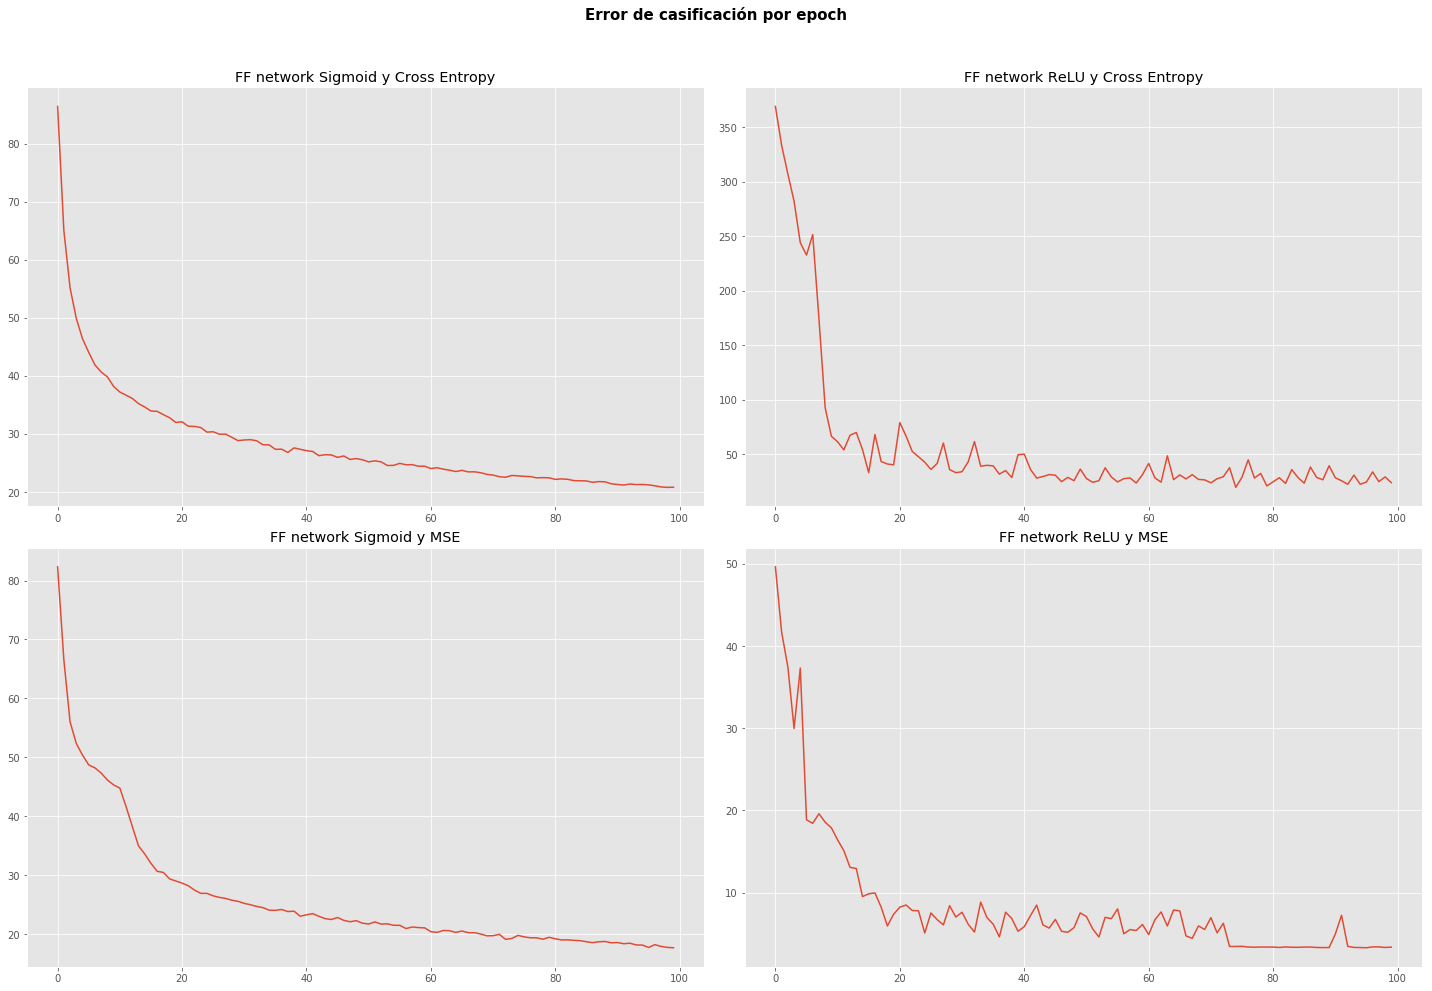

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.figure(figsize=(20, 14))
plt.suptitle("Error de casificación por epoch", fontsize = 15, fontweight = 'bold')

plt.subplot(2, 2, 1)
plt.title("FF network Sigmoid y Cross Entropy")
plt.plot(error_sigmoid_ce)

plt.subplot(2, 2, 2)
plt.title("FF network ReLU y Cross Entropy")
plt.plot(error_relu_ce)

plt.subplot(2, 2, 3)
plt.title("FF network Sigmoid y MSE")
plt.plot(error_sigmoid_mse)

plt.subplot(2, 2, 4)
plt.title("FF network ReLU y MSE")
plt.plot(error_relu_mse)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Aquellos modelos que utilizan como función de activación ReLU, convergen más rápido a valores pequeños, en especial en la combinación ReLU/MSE. En los modelos con función sigmoidal el decaimiento es rápido en un comienzo y luego las variaciones son menos, siendo curvas más suaves que las de ReLU, que poseen subidas y bajadas. El uso de MSE también favorece tener menor pérdida al inicio del entrenamiento.

Ahora, se grafica la accuracy de los modelos versus epochs.

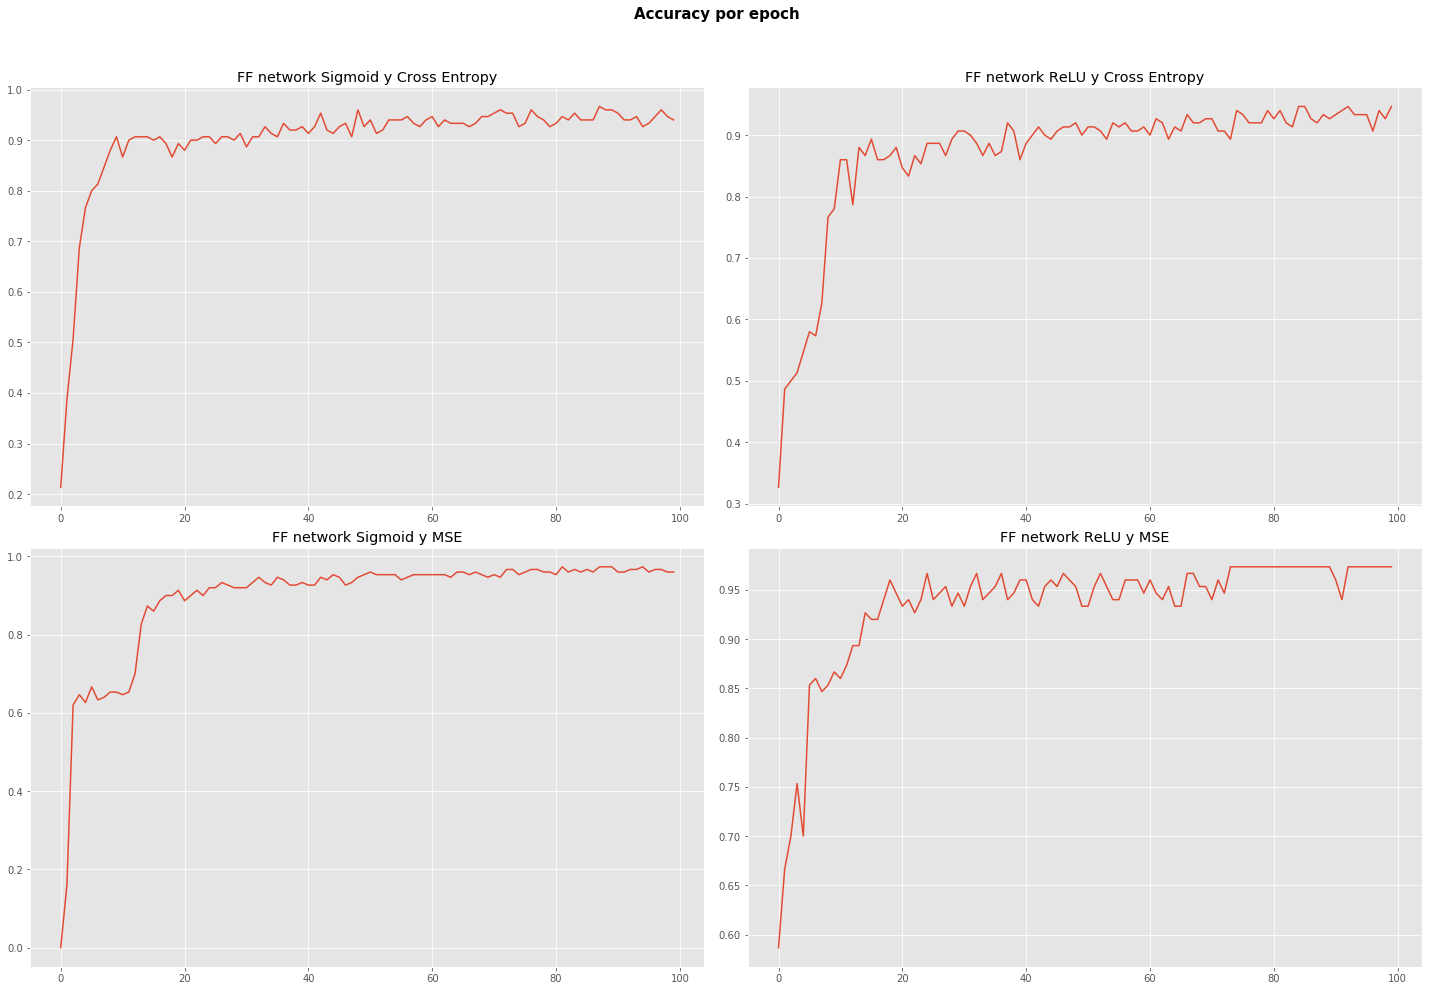

In [46]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 14))
plt.suptitle("Accuracy por epoch", fontsize = 15, fontweight = 'bold')
plt.subplot(2, 2, 1)

plt.title("FF network Sigmoid y Cross Entropy")
plt.plot(accuracy_sigmoid_ce)


plt.subplot(2, 2, 2)
plt.title("FF network ReLU y Cross Entropy")
plt.plot(accuracy_relu_ce)

plt.subplot(2, 2, 3)
plt.title("FF network Sigmoid y MSE")
plt.plot(accuracy_sigmoid_mse)

plt.subplot(2, 2, 4)
plt.title("FF network ReLU y MSE")
plt.plot(accuracy_relu_mse)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

En el caso de la accuracy los modelos con ReLU toman más tiempo en alcanzar valores cercanos a 1 pero son los que, mientras trasncurren más epochs, finalizan ajustándose más a los datos de entrenamiento que los modelos que emplean la función sigmoidal.

Como se mencionó anteriormente, para generar los útlimos gráficos, primero se normaliza los errores para apreciarlos en una misma escala en conjunto a la accuracy. Luego se grafican estas dos medidas versus la cantidad de epochs.

In [47]:
#normalizar los errores 
error_sigmoid_ce_norm = 1-(error_sigmoid_ce - np.max(error_sigmoid_ce))/-np.ptp(error_sigmoid_ce)
error_relu_ce_norm = 1-(error_relu_ce - np.max(error_relu_ce))/-np.ptp(error_relu_ce)
error_sigmoid_mse_norm = 1-(error_sigmoid_mse - np.max(error_sigmoid_mse))/-np.ptp(error_sigmoid_mse)
error_relu_mse_norm = 1-(error_relu_mse - np.max(error_relu_mse))/-np.ptp(error_relu_mse)

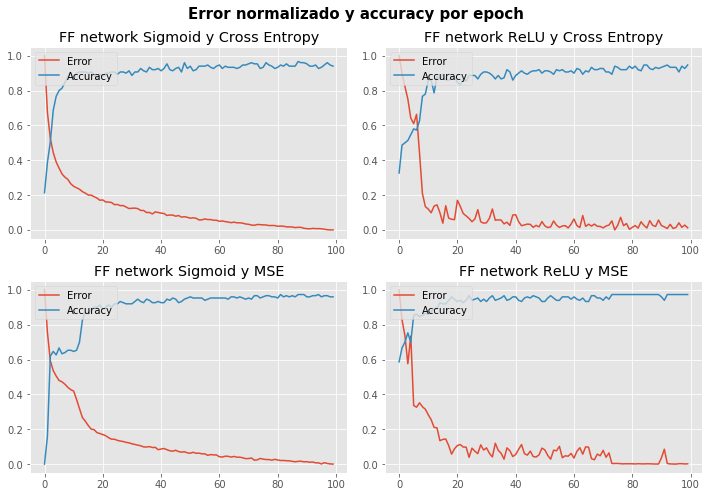

In [49]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 7))
plt.suptitle("Error normalizado y accuracy por epoch", fontsize = 15, fontweight = 'bold')

plt.subplot(2, 2, 1)
plt.title("FF network Sigmoid y Cross Entropy")
plt.plot(error_sigmoid_ce_norm)
plt.plot(accuracy_sigmoid_ce)
#plt.ylabel('Classification error')
#plt.xlabel('Epoch')
plt.legend(['Error', 'Accuracy'], loc='upper left')


plt.subplot(2, 2, 2)
plt.title("FF network ReLU y Cross Entropy")
plt.plot(error_relu_ce_norm)
plt.plot(accuracy_relu_ce)
#plt.ylabel('Classification error')
#plt.xlabel('Epoch')
plt.legend(['Error', 'Accuracy'], loc='upper left')

plt.subplot(2, 2, 3)
plt.title("FF network Sigmoid y MSE")
plt.plot(error_sigmoid_mse_norm)
plt.plot(accuracy_sigmoid_mse)
#plt.ylabel('Classification error')
#plt.xlabel('Epoch')
plt.legend(['Error', 'Accuracy'], loc='upper left')

plt.subplot(2, 2, 4)
plt.title("FF network ReLU y MSE")
plt.plot(error_relu_mse_norm)
plt.plot(accuracy_relu_mse)
#plt.ylabel('Classification error')
#plt.xlabel('Epoch')
plt.legend(['Error', 'Accuracy'], loc='upper left')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

De los gráficos anteriores se observa como los modelos con ReLU tienen mayor accuracy al comienzo, es decir, en las etapas tempranas del entrenamiento se ajustan mejor a las etiquetas del dataset. También, los modelos con esta misma función de activación tienen una pendiente mayor en el error al aumentar los epoch, consiguiendo valores bajo 0.2 antes que los entrenados con sigmoidal.

[9.639235734939575, 8.667047262191772, 9.978780508041382, 7.919617414474487]


Text(0.5,1,'Tiempo de entrenamiento')

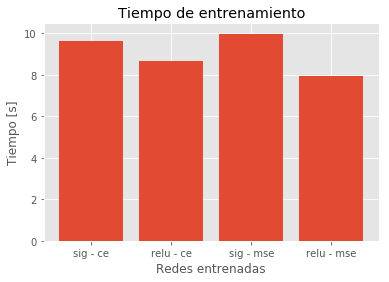

In [54]:
met = ["sig - ce", "relu - ce", "sig - mse", "relu - mse"]
posicion_y = np.arange(len(met))
print(time_train)
plt.bar(posicion_y, time_train, align = "center")
plt.xticks(posicion_y, met)
plt.xlabel('Redes entrenadas')
plt.ylabel('Tiempo [s]')
plt.title("Tiempo de entrenamiento")

El tiempo de entrenamiento de los cuatro modelos es parecido, siendo menor a diez segundos en todos los casos. Los modelos que demoran menos tiempo son los que utilizan ReLU como función de activación y los que demoran más ocupan la función Sigmoidal. La demora de los modelos con función sigmoidal puede deberse a que el entrenamiento con este tipo de activación toma más tiempo pues la derivada de los pesos varía lentamente, se demora en identificar la corrección de pesos y se produce una saturación entre 0 y 1 en las colas. La mayor ventaja de ReLU es la no saturación de su gradiente, que acelera la convengencia de SGD. 

Para las funciones de pérdida, sabemos que MSE funciona mejor para problemas de regresión y CCO tiene mejor desempeño en tareas de clasificación. Los resultados experimentales muestran como el modelo con MSE toma un menor tiempo que CCO usando ReLU, pero un mayor tiempo con función Sigmoidal.

Luego se muestra la matriz de confusión de los modelos entrenados. La matriz de confusión (o error matrix) es una herramienta que permite visualizar el desempeño de un algoritmo en machine learning, especialmente con algoritmos supervisados (en el caso de no supervisados se utiliza la matriz de matching). Cada fila de la matriz representa las instancias en una clase predecida, mientras que las columnas representan las instancias en una clase real. Tiene un especial uso para analizar cuándo un clasificador tiene confusión entre dos clases. Para este experimento se utilizará la matriz proporcionada por la librería *sklearn*.

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
pred_sig_ce = net_sigmoid_ce.predict(X_train)
#print(pred_sig_ce)
#print(y_train)

In [61]:
#predictions1 = model1.predict(X_train, verbose=0)
#y_pred1 = np.argmax(predictions1, axis=1)
print("Matriz de confusión Sigmoid/CCE")
print(confusion_matrix(y_train, pred_sig_ce))

Matriz de confusión Sigmoid/CCE
[[50  0  0]
 [ 0 49  1]
 [ 0  7 43]]


Con el resultado anterior queda claro que la red entrenada con la función de activación Sigmoidal y función de pérdida CCE logra una presición del 100% al clasificar los datos pertenecientes a la primera clase. En el caso de las clases dos y tres, se equivoca con una entrada de la clase dos clasificándola como clase tres y para el caso inverso, este fenómeno ocurre 7 veces. En la siguiente visualización de los datos se observa una clara distancia entre los datos de la primera clase con las otras, y la cercanía que hay entre la dos y la tres. La distribución de estos datos hace que la red no distinga bien información existente en la frontera por la similitud de algunas mediciones de plantas.
<img src="http://covartech.github.io/prtdoc/prtDocGettingStartedExamples_01.png" alt="dataset visualization" style="width: 500px;"/>

### 2. Comparar back-propagation (BP) de Keras

Keras es una de las librerı́as más populares para desarrollar nuevos modelos de redes neuronales o implementar eficientemente modelos conocidos con fines prácticos, puesto que ofrece una interfaz para poder trabajar de una manera mucho mas simple además de permitir también el manejo de configuraciones mas específicas.  
Como actividad pedagógica ahora se les pide comparar el algoritmo implementado por ustedes con el de alto nivel de la librería __[keras](https://keras.io/)__ . Se les pedirá comparar sobre el mismo dataset con la misma arquitectura utilizada anteriormente, es decir, dos capas ocultas (con 32 y 16 neuronas respectivamente), 3 neuronas en la capa de salida con función de activación softmax, optimizador Gradiente Descentente (GD) con tasa de aprendizaje fija.

<img src="https://i.imgur.com/hUjFUDU.png" width="40%" height="40%" />


> a) Defina, a través de la interfaz de keras, la arquitectura de la red, con las funciones de activación para comparar con la sección anterior.

Mediante Keras es posible definir fácilmente la arquitectura de una red, agregando capa por capa a la red detallando la cantidad de neuronas, la función de activación, la función de pérdida, entre otras configuraciones disponibles en la librería. Acá se visualiza la diferencia entre construir a mano una arquitectura de red neuronal versus la rapidez de importar y utilizar una librería que en cuatro lineas logra un resultado igual o mejor.

Se genera modelos combinando las funciones de activación Sigmoidal/ReLU y las funciones de pérdida CCO/MSE.

In [58]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

model1 = Sequential()
model1.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid"))
model1.add(Dense(16, activation="sigmoid"))
model1.add(Dense(3, activation="softmax"))

model2 = Sequential()
model2.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid"))
model2.add(Dense(16, activation="sigmoid"))
model2.add(Dense(3, activation="softmax"))

model3 = Sequential()
model3.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid"))
model3.add(Dense(16, activation="sigmoid"))
model3.add(Dense(3, activation="softmax"))

model4 = Sequential()
model4.add(Dense(32, input_dim=X_train.shape[1], activation="relu"))
model4.add(Dense(16, activation="relu"))
model4.add(Dense(3, activation="softmax"))

> b) Defina, a través de la interfaz de keras, el optimizador de la red, en conjunto con la función de error, para poder comparar con la sección anterior.
```python
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy or mse", metrics=["accuracy"])
```

Se seta el optimizador de la res con la función *compile* de la clase *Sequential*.

In [59]:
model1.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy", metrics=["accuracy"])
model2.compile(optimizer=SGD(lr=0.1),loss="mse", metrics=["accuracy"])
model3.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy", metrics=["accuracy"])
model4.compile(optimizer=SGD(lr=0.1),loss="mse", metrics=["accuracy"])

> c) Entrene (ajuste) los pesos de la red definida mediante keras, reportando los mismos gráficos de la sección anterior para poder comparar. Si hay diferencias en la convergencia del algoritmo ¿A qué podría deverse? si hay una gran diferencia en los tiempos de entrenamiento ¿A qué podría deverse?
```python
model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=1)
```

Con las arquitecturas ya creadas se procede a entrenar los modelos, midiendo el tiempo que le toma a cada red.

In [60]:
start_time = time.time()
history1 = model1.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=0)
print("-- training time Sigmoid/CCE : %s [s] --" % (time.time() - start_time))

start_time = time.time()
history2 = model2.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=0)
print("-- training time Sigmoid/MSE : %s [s] --" % (time.time() - start_time))

start_time = time.time()
history3 = model3.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=0)
print("-- training time ReLU/CCE : %s [s] --" % (time.time() - start_time))

start_time = time.time()
history4 = model4.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=0)
print("-- training time ReLU/MSE : %s [s] --" % (time.time() - start_time))

-- training time Sigmoid/CCE : 34.047524213790894 [s] --
-- training time Sigmoid/MSE : 33.293163776397705 [s] --
-- training time ReLU/CCE : 36.72345972061157 [s] --
-- training time ReLU/MSE : 34.02793574333191 [s] --


Los tiempos de ejecución de los modelos de Keras son casi cuatro veces mayores a los de la red programada desde cero. Además, en este caso los modelos entrenados con función sigmoidal demoraron menos que los con ReLU. Deben demorarse más pues Keras tiene que tener implementados más algoritmos internos para mejorar sus resultados, a diferencia que la implementación propia es más simple.

A continuación se grafican los errores de los de keras junto a los obtenidos en el punto 1.

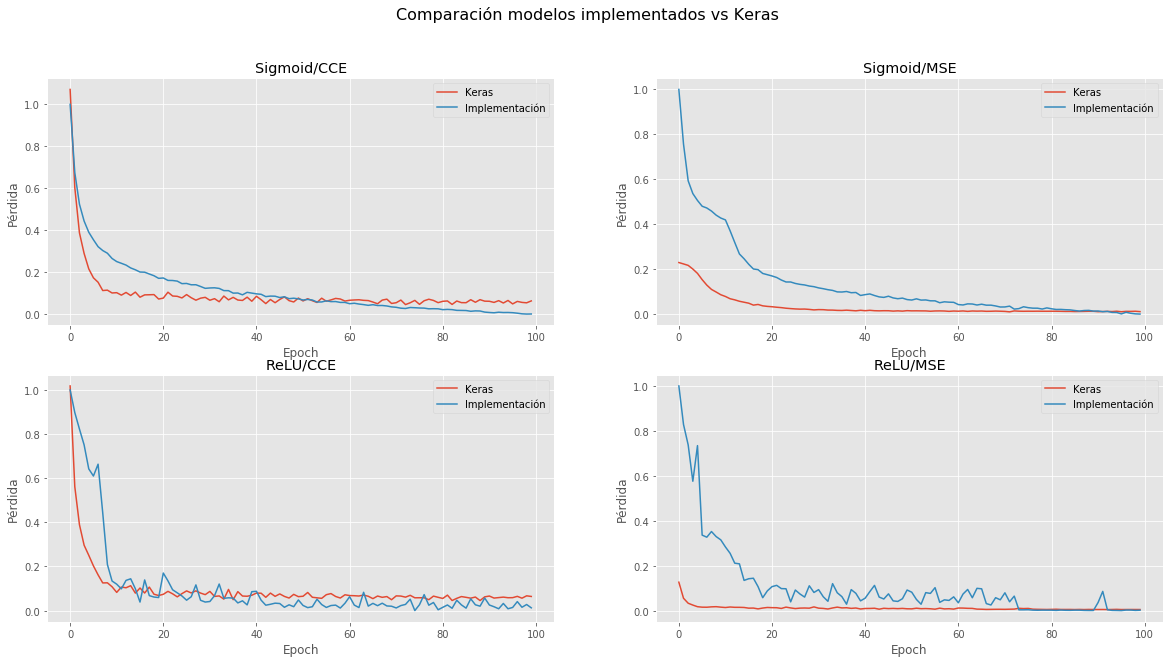

In [75]:
plt.figure(figsize=(20,10))
plt.suptitle("Comparación modelos implementados vs Keras", fontsize=16)

plt.subplot(221)
plt.gca().set_title('Sigmoid/CCE') 
plt.plot(history1.history["loss"], label="Keras")
plt.plot(error_sigmoid_ce_norm, label="Implementación")
plt.xlabel("Epoch")
plt.ylabel("Pérdida")
plt.legend(["Keras","Implementación"])

plt.subplot(222)
plt.gca().set_title('Sigmoid/MSE')
plt.plot(history2.history["loss"], label="Keras")
plt.plot(error_sigmoid_mse_norm, label="Implementación")
plt.xlabel("Epoch")
plt.ylabel("Pérdida")
plt.legend(["Keras","Implementación"])

plt.subplot(223)
plt.gca().set_title('ReLU/CCE')
plt.plot(history3.history["loss"], label="Keras")
plt.plot(error_relu_ce_norm, label="Implementación")
plt.xlabel("Epoch")
plt.ylabel("Pérdida")
plt.legend(["Keras","Implementación"])

plt.subplot(224)
plt.gca().set_title('ReLU/MSE')
plt.plot(history4.history["loss"], label="Keras")
plt.plot(error_relu_mse_norm, label="Implementación")
plt.xlabel("Epoch")
plt.ylabel("Pérdida")
plt.legend(["Keras","Implementación"])
plt.show()

Al graficar las funciones de pérdida se ve que la implementación de red tiene resultados, en un comienzo, peores que los de Keras. Pero a medida que aumenta la cantidad de epoch, esta diferencia disminuye siendo más bajo para las configuraciones de ReLU/CCE y Sigmoidal/CCE. Este fenómeno no se da en todos los casos de prueba pues en algunos entrenamientos, los resultados entregados por la red implementada fueron de una calidad muy baja bajo el 90% de accuracy. Por lo tanto las curvas visualizadas corresponden a los mejores resultados de una serie de entrenamientos de la sección 1.

A diferencia de los métodos implementados, Keras converge con mayor rapidez en todos los casos. Los mejores resultados corresponden a los modelos con MSE. Esta es una ventaja de Keras requeriendo menos iteraciones del algoritmo para alcanzar mejores resultados.



A continuación se visualizan las matrices de confusión para determinar numéricamente la cantidad de errores que cometió al predecir las etiquetas de los datos de entranamiento.

In [78]:
predictions1 = model1.predict(X_train, verbose=0)
y_pred1 = np.argmax(predictions1, axis=1)
print("Matriz de confusión Sigmoid/CCE")
print(confusion_matrix(y_train, y_pred1))

predictions2 = model2.predict(X_train, verbose=0)
y_pred2 = np.argmax(predictions2, axis=1)
print("Matriz de confusión Sigmoid/MSE")
print(confusion_matrix(y_train, y_pred2))

predictions3 = model3.predict(X_train, verbose=0)
y_pred3 = np.argmax(predictions3, axis=1)
print("Matriz de confusión ReLU/CCE")
print(confusion_matrix(y_train, y_pred3))

predictions4 = model4.predict(X_train, verbose=0)
y_pred4 = np.argmax(predictions4, axis=1)
print("Matriz de confusión ReLU/MSE")
print(confusion_matrix(y_train, y_pred4))

Matriz de confusión Sigmoid/CCE
[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]
Matriz de confusión Sigmoid/MSE
[[50  0  0]
 [ 0 50  0]
 [ 0  6 44]]
Matriz de confusión ReLU/CCE
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]
Matriz de confusión ReLU/MSE
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]


Mostrando las matrices de confusión para los cuatro modelos queda en evidecia los problemas que existen para clasificar los datos de la clase dos y tres (Iris Versicolor e Iris Virginica, respectivamente] por su similitud en la frontera que separa las dos clases. Los modelos clasifican bien la primera clase pues sus datos son diferenciables del resto. Los modelos con menos errores de clasificación son los que trabajan con ReLU.

### 3. Verificación numérica del gradiente para una componente

En esta sección deberá verificar numéricamente el gradiente para los parámetros del modelo (que en este caso son los pesos de la red), que hasta ahora a definido de manera analítica en su programa, por ejemplo la derivada de $x^2$ es $2x$. Ahora deberá verificar estos cálculos usando la definición de gradiente.

$$ \nabla_{w} Loss = \lim_{\epsilon \rightarrow 0} \frac{Loss(w+ \epsilon)-Loss(w)}{\epsilon} $$

Debido a que el *forward propagation* es relativamente fácil de implementar, se puede confiar en que se realizó de manera correcta, por lo que el cómputo del error (*loss*) debería ser correcto. Esto significa que podemos verificar el gradiente o la derivada analítica del error $\frac{\partial Loss}{\partial w}$ comprobando que el resultado obtenido es similar (dentro de una tolerancia numérica, por ejemplo $10^6$) al valor que obtenemos aplicando la fórmula anterior. Naturalmente interpretaremos $\lim_{\epsilon \rightarrow 0}$ como un valor "*suficientemente pequeño*" de $\epsilon$.

> a) Para un peso escogido aleatoriamente entre la primera capa de la red (*input*) y la primera capa oculta, calcule el valor del gradiente de la función de error para ambas funciones utilizadas (ayúdese mediante las funciones de *backward pass* implementadas anteriormente), luego compare y verifique con el valor numérico del gradiente mediante el procedimiento explicado anteriormente.

Para un peso escogido aleatoriamente entre la primera capa de la red (*input*) y la primera capa oculta,el gradiente o la derivada analítica del error corresponde a $\frac{\partial Loss}{\partial w_1}$. Para realizar esta tarea se construyeron tres funciones, que deberían estar dentro de la clase Network, pero para un mayor orden se implementaron por separado.

La primera función se encarga de obtener los pesos de la red, la segunda obtiene las derivadas y la tercera modifica los pesos para una capa dada.

In [149]:
def get_weights(model):
    weights_net = []
    for i in range(len(model.layers)-1):
        weights_layer = []
        for j in range(len(model.layers[i])-1):
            weights_layer.append([])
        weights_net.append(weights_layer)
        for j in range(len(model.layers[i+1])-1):
            w_neuron = []
            for dendron in model.layers[i+1][j].dendrons[:-1]:
                w_neuron.append([dendron.weight])
            weights_net[i] = np.append(weights_net[i], w_neuron, axis=1)
    
    return weights_net

def get_d_weights(model):
    #print("get_d_weights")
    weights_net = []
    for i in range(len(model.layers)-1):
        weights_layer = []
        for j in range(len(model.layers[i])-1):
            weights_layer.append([])
        weights_net.append(weights_layer)
        for j in range(len(model.layers[i+1])-1):
            w_neuron = []
            for dendron in model.layers[i+1][j].dendrons[:-1]:
                #print(dendron.d_weight)
                w_neuron.append([dendron.d_weight])
            weights_net[i] = np.append(weights_net[i], w_neuron, axis=1)
    
    return weights_net

def set_weights(model, layer, new_weights):
    for j in range(len(model.layers[layer])-1):
        for k in range(len(model.layers[layer][j].dendrons[:-1])):
            model.layers[layer][j].dendrons[k].weight = new_weights[k][j]

Construidas estas tres funciones, se entrena la red. Primero se obtienen los pesos originales y las derivadas de estos pesos. Calculado esto se realiza el cálculo de la derivada con la definición de $\nabla_{w} Loss$ del enunciado. Finalmente se hace la diference entre estos dos cálculos, para ser graficados posteriormente.

In [150]:
epsilon = 10e-10
x = X_train[0]
y = y_onehot[0]
der_original = []
der_limite = []
pseudo_epoch = 100
for i in range(pseudo_epoch):
    #set  modelos
    model = Network(topology)
    model.activation_function = "sigmoid"
    model.type_error = "cross_entropy"
    model.set_input(x)
    model_epsilon = Network(topology)
    model_epsilon.activation_function = "sigmoid"
    model_epsilon.type_error = "cross_entropy"
    model_epsilon.set_input(x)
    
    #obtener pesos y derivadas de pesos originales loss(w)
    weights_0_1 =  get_weights(model)[0]    #pesos entre capa 0 (entrada) y 1 (primera capa oculta)
    model.forward_pass(model.activation_function)
    model.backward_pass(x, model.activation_function)
    error = model.get_error(y, model.type_error)
    d_weight = get_d_weights(model)[0][0][0] #derivada del peso entre capa 0 y 1 de la entre las primeras neuronas de cada capa, se podria randomizar
    der_original.append(d_weight)
    
    #obtener derivada con la definición loss(w+epsilon)
    #print(weights_0_1[0][0])
    weights_0_1[0][0] = weights_0_1[0][0] + epsilon
    #print(weights_0_1[0][0])
    set_weights(model_epsilon, 1, weights_0_1) #capa entre que esta 
    model_epsilon.forward_pass(model_epsilon.activation_function)
    model_epsilon.backward_pass(x, model_epsilon.activation_function)
    error_epsilon = model_epsilon.get_error(y, model_epsilon.type_error)
    
    definicion_lim = (error_epsilon - error)/epsilon
    der_limite.append(definicion_lim)
    #print(i, " d_weight ", d_weight, " error ", error, " error_epsilon", error_epsilon, " limite ", definicion_lim)

print(der_original)
print(der_limite)


[-2.6390184316924e-07, -6.135291898836341e-06, -5.481815307613969e-07, -4.187212592309403e-08, -2.2388926321744912e-05, -6.354613482125925e-08, 4.7393269073787007e-07, 7.883894477138871e-07, -6.946035888663152e-06, 8.017876209732724e-09, -8.684073169293652e-07, 5.94317327746834e-06, 2.8500249618246207e-05, 1.8868621640802734e-05, 4.157998088574533e-06, -1.576321637783715e-07, 3.1453970489071074e-06, 1.3577703977006727e-06, -1.5556895008884167e-07, 2.9268015192673293e-06, -2.013999691399257e-06, 1.5037320978710408e-05, 1.0236624524514043e-05, -3.3182747421517524e-07, -4.31388074231153e-06, -8.227278581925612e-06, 5.294161235722384e-07, 1.4332454641445787e-05, -9.859627759162615e-08, -6.6706380927607786e-06, 5.070726907896892e-07, -3.07915288217496e-05, -2.7850799273572053e-05, 3.6459927909468035e-06, 1.3695030332211098e-06, 1.6156463057042393e-06, 8.59025134542268e-08, -2.3385313806852745e-07, -2.285034469737262e-05, 1.610275953823278e-05, 1.2771687935247684e-07, -1.43758679398866e-05, 

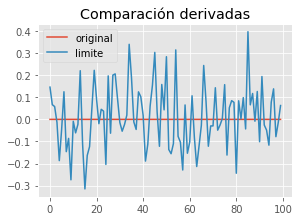

In [151]:
plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.title("Comparación derivadas")
plt.plot(der_original)
plt.plot(der_limite)
plt.legend(['original', 'limite'], loc='upper left')

In [152]:
np.mean(np.subtract( der_original,der_limite))

-0.012676066763228949

A pesar de que en el gráfico se observe que las dos curvas tienen valores muy diferentes, en promedio esta diferencia es baja con un valor de -0.012676 aproximado. Por lo que hay una tolerancia numérica baja lo cual verificaría que los calculos del modelo de la parte uno están dentro del margen de lo aceptable (mucho menor a $10^6$ entregado por el enunciado).

> b) Vuelva a verificar el valor del gradiente para otros dos pesos escodigos aleatoriamente en la primera operación de la red. Compare y concluya.

In [160]:
x = X_train[0]
y = y_onehot[0]
der_original = []
der_limite = []
pseudo_epoch = 100
for i in range(pseudo_epoch):
    #set  modelos
    model = Network(topology)
    model.activation_function = "sigmoid"
    model.type_error = "cross_entropy"
    model.set_input(x)
    model_epsilon = Network(topology)
    model_epsilon.activation_function = "sigmoid"
    model_epsilon.type_error = "cross_entropy"
    model_epsilon.set_input(x)
    random_neuron = np.random.randint(32)
    
    #obtener pesos y erivadas de pesos originales loss(w)
    weights_0_1 =  get_weights(model)[0]    #pesos entre capa 0 (entrada) y 1 (primera capa oculta)
    model.forward_pass(model.activation_function)
    model.backward_pass(x, model.activation_function)
    error = model.get_error(y, model.type_error)
    d_weight = get_d_weights(model)[0][0][random_neuron] #derivada del peso entre capa 0 y 1 de la entre las primeras neuronas de cada capa, se podria randomizar
    der_original.append(d_weight)
    
    #obtener derivada con la definición loss(w+epsilon)
    #print(weights_0_1[0][random_neuron])
    weights_0_1[0][random_neuron] = weights_0_1[0][random_neuron] + epsilon
    #print(weights_0_1[0][random_neuron])
    set_weights(model_epsilon, 1, weights_0_1) #capa entre que esta 
    model_epsilon.forward_pass(model_epsilon.activation_function)
    model_epsilon.backward_pass(x, model_epsilon.activation_function)
    error_epsilon = model_epsilon.get_error(y, model_epsilon.type_error)
    
    definicion_lim = (error_epsilon - error)/epsilon
    der_limite.append(definicion_lim)

-0.026990548756968748

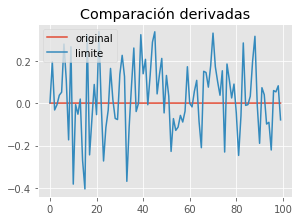

In [161]:
plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.title("Comparación derivadas")
plt.plot(der_original)
plt.plot(der_limite)
plt.legend(['original', 'limite'], loc='upper left')
np.mean(np.subtract( der_original,der_limite))

In [162]:
x = X_train[0]
y = y_onehot[0]
der_original = []
der_limite = []
pseudo_epoch = 100
for i in range(pseudo_epoch):
    #set  modelos
    model = Network(topology)
    model.activation_function = "sigmoid"
    model.type_error = "MSE"
    model.set_input(x)
    model_epsilon = Network(topology)
    model_epsilon.activation_function = "sigmoid"
    model_epsilon.type_error = "MSE"
    model_epsilon.set_input(x)
    random_neuron = np.random.randint(32)
    
    #obtener pesos y erivadas de pesos originales loss(w)
    weights_0_1 =  get_weights(model)[0]    #pesos entre capa 0 (entrada) y 1 (primera capa oculta)
    model.forward_pass(model.activation_function)
    model.backward_pass(x, model.activation_function)
    error = model.get_error(y, model.type_error)
    d_weight = get_d_weights(model)[0][0][random_neuron] #derivada del peso entre capa 0 y 1 de la entre las primeras neuronas de cada capa, se podria randomizar
    der_original.append(d_weight)
    
    #obtener derivada con la definición loss(w+epsilon)
    #print(weights_0_1[0][random_neuron])
    weights_0_1[0][random_neuron] = weights_0_1[0][random_neuron] + epsilon
    #print(weights_0_1[0][random_neuron])
    set_weights(model_epsilon, 1, weights_0_1) #capa entre que esta 
    model_epsilon.forward_pass(model_epsilon.activation_function)
    model_epsilon.backward_pass(x, model_epsilon.activation_function)
    error_epsilon = model_epsilon.get_error(y, model_epsilon.type_error)
    
    definicion_lim = (error_epsilon - error)/epsilon
    der_limite.append(definicion_lim)

-0.003017652364286257

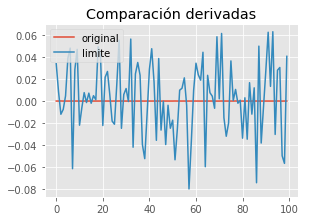

In [163]:
plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.title("Comparación derivadas")
plt.plot(der_original)
plt.plot(der_limite)
plt.legend(['original', 'limite'], loc='upper left')
np.mean(np.subtract( der_original,der_limite))

Se calculó la diferencia de las derivadas para otras dos neuronas, y a su vez se modificó la función de pérdida en esta última por MSE. Se puede confirmar lo visto en el punto a) con una función de pérdida diferente. 

### 4. Implementar *momentum* como variante

En esta sección deberá construir, sin usar librerı́as, excepto eventualmente *numpy* para implementar operaciones básicas de algebra lineal, una variante del programa definido anteriormente ([sección 1](#primero)) que entrene la red utilizando *momentum* clásico.

$$ v^{(t+1)} \leftarrow \mu v^{(t)} - \eta \nabla_{w^{(t)}} Loss \\
w^{(t+1)} \leftarrow w^{(t)} + v^{(t+1)}
$$

>> *Sutskever, I., Martens, J., Dahl, G., & Hinton, G. (2013, February). On the importance of initialization and momentum in deep learning. In International conference on machine learning (pp. 1139-1147).*


> Demuestre que su programa funciona en el mismo problema de clasificación presentado anteriormente, para esto, además deberá construir un gráfico de la función de error o pérdida (*loss*) *vs* el número de *epochs* y comentar/analizar la convergencia. ¿Es una mejora significativa? 

En redes neuronales, se utiliza *gradient descent* para minimizar el error de la función de evaluación para alcanzar un mínimo global. En un espacio de soluciones cóncavo es fácil encontrar un óptimo global porque no hay mínimos locales donde la función pueda quedarse atrapada. En problemas más complejos, los espacios de soluciones tienden a ser convexos, dificultando la posibilidad de encontrar un óptimo global.

Para evitar esta situación, se introduce el concepto de *momentum* en la función objetivo, el cual se evalua en $[0,1]$ incrementando el tamaño de los pasos que da el algoritmos para escapar de estos mínimos locales. Si se escoje un *momentum* grande, entonces la tasa de aprendizaje debería mantenerse más pequeña. Un gran valor de *momentum* también significa que la convergencia ocurrirá rápidamente. Pero si tanto el *momentum* como la tasa de aprendizaje se mantienen en valores grandes, entonces puede escapar de un mínimo con un gran paso. Un valor pequeño de *momentum* no puede evitar de manera confiable los mínimos locales, ralentizando el entrenamiento del sistema. El *momentum* también ayuda a suavizar las variaciones, si el gradiente cambia de dirección.

Dada una función objetivo $f(\theta)$ a ser minimizada, el momentum clásico viene dado por:

$$ v^{(t+1)} \leftarrow \mu v^{(t)} - \eta \nabla_{w^{(t)}} Loss \\
w^{(t+1)} \leftarrow w^{(t)} + v^{(t+1)}
$$

donde $\eta$ es la tasa de aprendizaje (*learning rate*), $\mu\in[0,1]$ es el coeficiente de momentum, y $\nabla_{w^{(t)}} Loss$ es el gradiente de $w^{(t)}$.

Dentro de la clase Neuron se encuentra la función backward. En este paso del entrenamiento es cuando es aplicado el *momentun* para mejorar el aprendizaje de la red. Queda representado con el atributo alpha. Además se debe incluir la variable que representa al *momentum* en la clase Neuron.

```python
    def backward(self, activation_function, last):
        if(last or activation_function == "sigmoid"):
            self.gradient = self.error * self.gradient_activation(self.output)
        else:
            self.gradient = self.error * self.d_relu(self.output)
        #print("learning_rate aplicado ", Neuron.learning_rate)
        for dendron in self.dendrons:
            dendron.d_weight = Neuron.learning_rate * (
            dendron.connected_neuron.output * self.gradient) + self.alpha * dendron.d_weight
            dendron.weight = dendron.weight + dendron.d_weight
            dendron.connected_neuron.add_error(dendron.weight * self.gradient)
        self.error = 0;
```
Luego de haber hecho este cambio se setea el *momentum* con un valor de 0.5 y se procede a entrenar los mismos modelos del punto uno. Luego de esto se genera el gráfico de error/accuracy versus epochs.

In [109]:
net_sigmoid_ce_m = Network(topology)
net_sigmoid_ce_m.activation_function = "sigmoid"
net_sigmoid_ce_m.type_error = "cross_entropy"
net_sigmoid_ce_m.epoch = 100
start_time = time.time()
error_sigmoid_ce_m, accuracy_sigmoid_ce_m = net_sigmoid_ce_m.train(X_train, y_onehot)
print("-- training time: %s [s] --" % (time.time() - start_time))

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99
-- trainin

In [140]:
net_relu_ce_m = Network(topology)
net_relu_ce_m.activation_function = "relu"
net_relu_ce_m.type_error = "cross_entropy"
net_relu_ce_m.epoch = 100
start_time = time.time()
error_relu_ce_m, accuracy_relu_ce_m = net_relu_ce_m.train(X_train, y_onehot)
print("-- training time: %s [s] --" % (time.time() - start_time))

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99
-- trainin

In [123]:
net_sigmoid_mse_m = Network(topology)
net_sigmoid_mse_m.activation_function = "sigmoid"
net_sigmoid_mse_m.type_error = "MSE"
net_sigmoid_mse_m.epoch = 100
start_time = time.time()
error_sigmoid_mse_m, accuracy_sigmoid_mse_m = net_sigmoid_mse_m.train(X_train, y_onehot)
print("-- training time: %s [s] --" % (time.time() - start_time))

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99
-- trainin

In [136]:
net_relu_mse_m = Network(topology)
net_relu_mse_m.activation_function = "relu"
net_relu_mse_m.type_error = "MSE"
net_relu_mse_m.epoch = 100
start_time = time.time()
error_relu_mse_m, accuracy_relu_mse_m = net_relu_mse_m.train(X_train, y_onehot)
print("-- training time: %s [s] --" % (time.time() - start_time))

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99
-- trainin

In [142]:
#normalizar los errores 
error_sigmoid_ce_norm_m = 1-(error_sigmoid_ce_m - np.max(error_sigmoid_ce_m))/-np.ptp(error_sigmoid_ce_m)
error_relu_ce_norm_m = 1-(error_relu_ce_m - np.max(error_relu_ce_m))/-np.ptp(error_relu_ce_m)
error_sigmoid_mse_norm_m = 1-(error_sigmoid_mse_m - np.max(error_sigmoid_mse_m))/-np.ptp(error_sigmoid_mse_m)
error_relu_mse_norm_m = 1-(error_relu_mse_m - np.max(error_relu_mse_m))/-np.ptp(error_relu_mse_m)

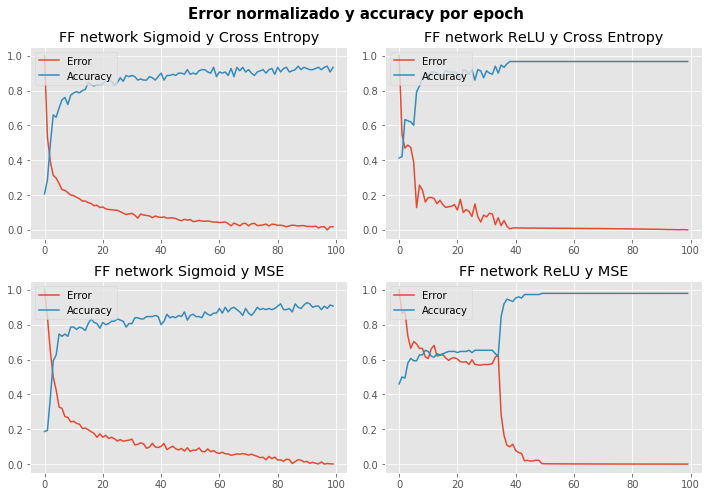

In [143]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 7))
plt.suptitle("Error normalizado y accuracy por epoch", fontsize = 15, fontweight = 'bold')

plt.subplot(2, 2, 1)
plt.title("FF network Sigmoid y Cross Entropy")
plt.plot(error_sigmoid_ce_norm_m)
plt.plot(accuracy_sigmoid_ce_m)
#plt.ylabel('Classification error')
#plt.xlabel('Epoch')
plt.legend(['Error', 'Accuracy'], loc='upper left')


plt.subplot(2, 2, 2)
plt.title("FF network ReLU y Cross Entropy")
plt.plot(error_relu_ce_norm_m)
plt.plot(accuracy_relu_ce_m)
#plt.ylabel('Classification error')
#plt.xlabel('Epoch')
plt.legend(['Error', 'Accuracy'], loc='upper left')

plt.subplot(2, 2, 3)
plt.title("FF network Sigmoid y MSE")
plt.plot(error_sigmoid_mse_norm_m)
plt.plot(accuracy_sigmoid_mse_m)
#plt.ylabel('Classification error')
#plt.xlabel('Epoch')
plt.legend(['Error', 'Accuracy'], loc='upper left')

plt.subplot(2, 2, 4)
plt.title("FF network ReLU y MSE")
plt.plot(error_relu_mse_norm_m)
plt.plot(accuracy_relu_mse_m)
#plt.ylabel('Classification error')
#plt.xlabel('Epoch')
plt.legend(['Error', 'Accuracy'], loc='upper left')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Los tiempos de ejecución con *momentum* 0.5 no varían más que unas unidades de los resultados del punto 1 así que sería arriesgado hacer alguna aseveración respecto. Además, diferentes entrenamientos para un mismo modelo arrojaron diferentes tiempo, siendo algunos mayores y otros menores. Si se puede decir que aun utilizando el parámetro de *momentum* los entrenamientos siguen haciendose en menos tiempo que los hechos en Keras.

Para el modelo Sigmoidal/CCE se obtiene un ligero cambio teniendo una pendiente más empinada en un comienzo. La accuracy crece un poco más lenta pero alcanza los mismos valores que sin utilizar *momentum*.

Para Sigmoidal/MSE el modelo presenta una mejor accuracy en un comienzo, creciendo la curva más lento aproximadamente a los 20 epochs. En el caso del error este disminuye considerablemente utilizando *momentum*.

En el modelo ReLU/CCE tanto el error como la accuracy convergen a un valor constante cercano a los 40 epochs, y a una velocidad mayor que los primeros experimentos.

Finalmente, el modelo ReLU/MSE tiene un inicio mucho más lento siendo casi constante cercano a los 35 epochs para luego disminuir/aumentar con mucha rapidez hasta mantenerse casi constante en sus fronteras. 

Como resultado, en estos experimentos con *momentum* los modelos son capaces de moverse más rápido, en términos de optimización, que los modelos sin este parámetro. Este efecto se ve disminuido al estar más cercano de converger a una solución óptima.